In [15]:
import kechain2.client

c = kechain2.client.Client()
c.parts()

LoginRequiredError: Authentication credentials were not provided.

In [4]:
import kechain2.client

c = kechain2.client.Client()
c.login('admin', 'pass')
c.parts()

Part,ID
Bike Project,73c78109-4a34-463b-8823-3fc734b26218
Product,ed261cc2-e417-414a-aef5-946df8817b29
Bike,a8751a67-ce63-4308-81a7-e47712376782
Frame,bf369bb8-b649-4bc9-ba7a-f35e357f4711
Front Fork,2fcec18c-dd4d-4cd4-89d8-3db04147c30f
Seat,7ede1e33-e224-41a0-87a0-6a5f151991b3
Front Wheel,fe1b868a-894a-406f-a78d-33e57578a2e9
Rear Wheel,6f773001-5b7e-452d-a46b-c98361170753
Joost,ed7e2afe-5599-4f9c-8872-fc7e2baa0fff
Catalog,a6882108-1f1a-4d93-9702-a9f40bc753db


In [14]:
from kechain2 import Client

c = Client()
c.login(token="e920094902818b26feb4fac3dfa2904fff88649c")
bike = c.part('Bike')
wheel = c.model('Wheel')

bike.add(wheel, name='test-wheel')

Property,Value
Diameter,None
Spokes,None
Rim Material,None
Tire Thickness,None


In [6]:
for p in c.parts('test-wheel'):
    p.delete()

In [7]:
from kechain2.api import client as kec
kec.login(token="e920094902818b26feb4fac3dfa2904fff88649c")

front_wheel = kec.part('Front Wheel')
diameter = front_wheel.property('Diameter')
diameter.value = 100

In [8]:
kec.part('Bike').property('Gears').value

99999

In [9]:
kec.parts('Bike', category=None)

Part,Category,ID
Bike,MODEL,df504613-7bca-428a-974f-e1f8aee933f3
Bike,INSTANCE,a8751a67-ce63-4308-81a7-e47712376782


In [10]:
project = kec.scope('Bike Project')
project.part('Frame')

Property,Value
Material,Aluminum
Color,KE-works orange2


In [15]:
project.parts(model=project.model('Wheel'))

Part,ID
Front Wheel,fe1b868a-894a-406f-a78d-33e57578a2e9
Rear Wheel,6f773001-5b7e-452d-a46b-c98361170753
Wheel,0a9f15e1-2942-4d85-b5e0-bf06b324ba1e
Wheel,4241e502-bcfa-4360-a477-08fe6ec56b33
Wheel,c3d0f780-fd2c-44a4-a410-4a6bdc1131aa
Wheel,bfa88a9a-077b-43d9-af25-281576b13ca6
Joost,ed7e2afe-5599-4f9c-8872-fc7e2baa0fff
HOI,4383acfa-8296-4ac1-8f29-b3eb32eecc99
HOI,cec98e16-7f0e-4c59-9439-1a6d977f7255


In [16]:
from IPython.display import display

task = kec.activity("Specify wheel diameter")

for p in task.parts():        
    display(p)

Property,Value
Gears,99999
Total height,None
Picture,attachments/46172f2b-0345-4506-91a4-1b60eed98bf8/plot_ro87pr0.png
Description,You see Joost
Expiring date,None
Website,None
Sale?,True


Property,Value
Material,Aluminum


In [2]:
kec.properties('Diameter')[1].part.property('Spokes').value = 200

In [4]:
wheel = kec.model('Wheel')
bike = kec.part('Bike')

bike.add(wheel)

Property,Value
Diameter,None
Spokes,None
Rim Material,None
Tire Thickness,None


In [12]:
import math
import random

wheel_model = kec.part(name='Wheel', category='MODEL')
wheels = kec.parts(model=wheel_model)

for wheel in wheels:
    num_spokes = random.randint(1, 10)
    noise = random.random() * 3
    
    wheel.property('Spokes').value = num_spokes
    wheel.property('Diameter').value = 10 * math.sin(num_spokes) + noise

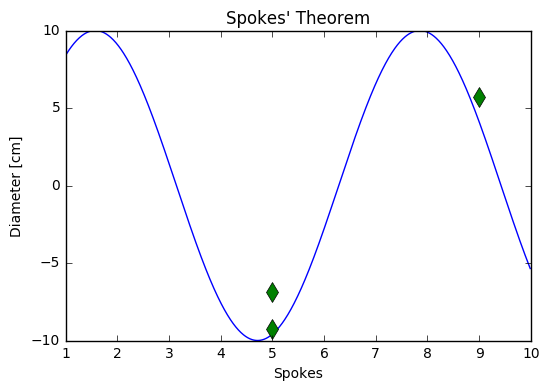

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 10, 0.01)
y = 10 * np.sin(x)
plt.plot(x, y)

wheels = kec.parts(model=kec.model('Wheel'))
plt.plot(wheels['Spokes'], wheels['Diameter'], 'd', markersize=10)

plt.xlabel('Spokes')
plt.ylabel('Diameter [cm]')
plt.title('Spokes\' Theorem')

kec.part('Bike').property('Picture').value = plt.gcf()

plt.show()